# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:39:33.574500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:39:37.007274
2025-04-14 21:39:37.007274


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 5
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:39:31"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

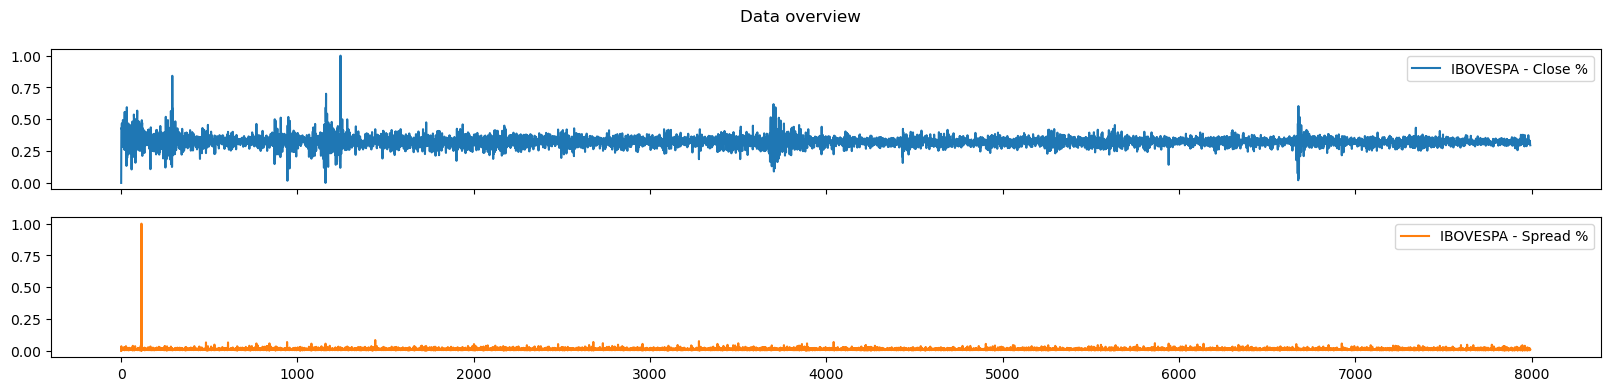

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

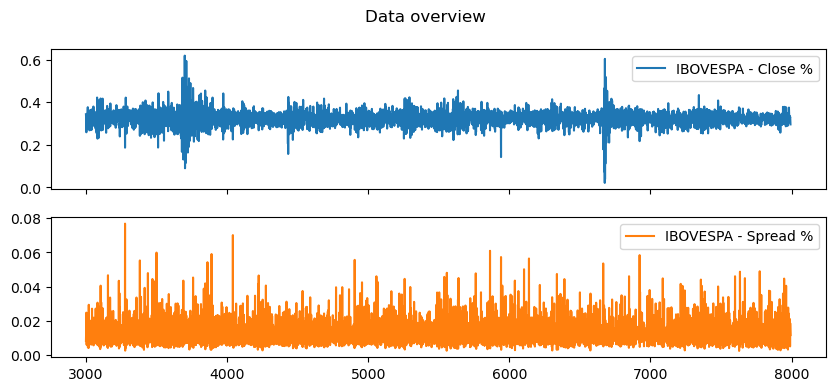

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

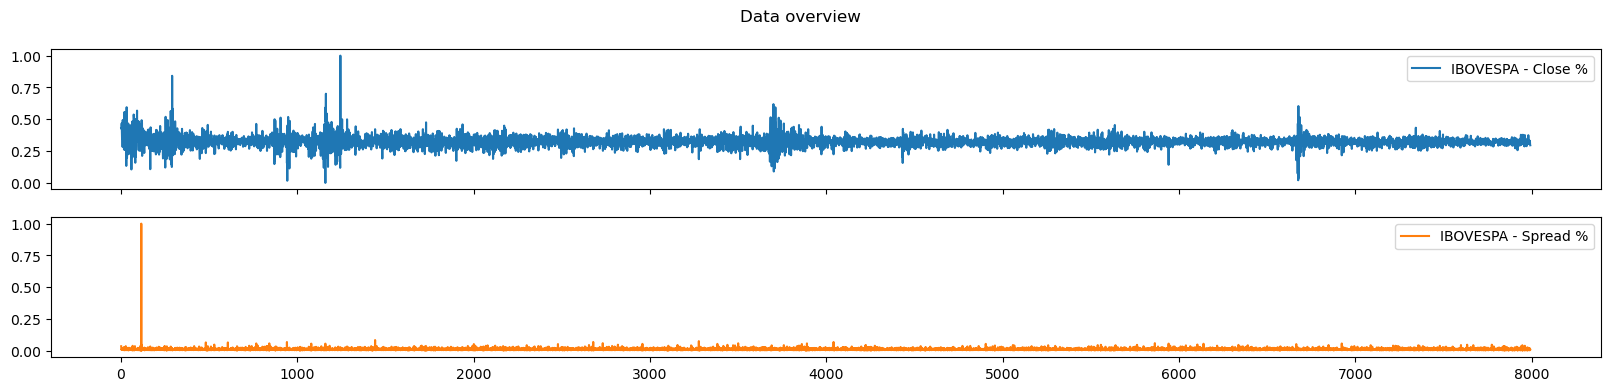

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

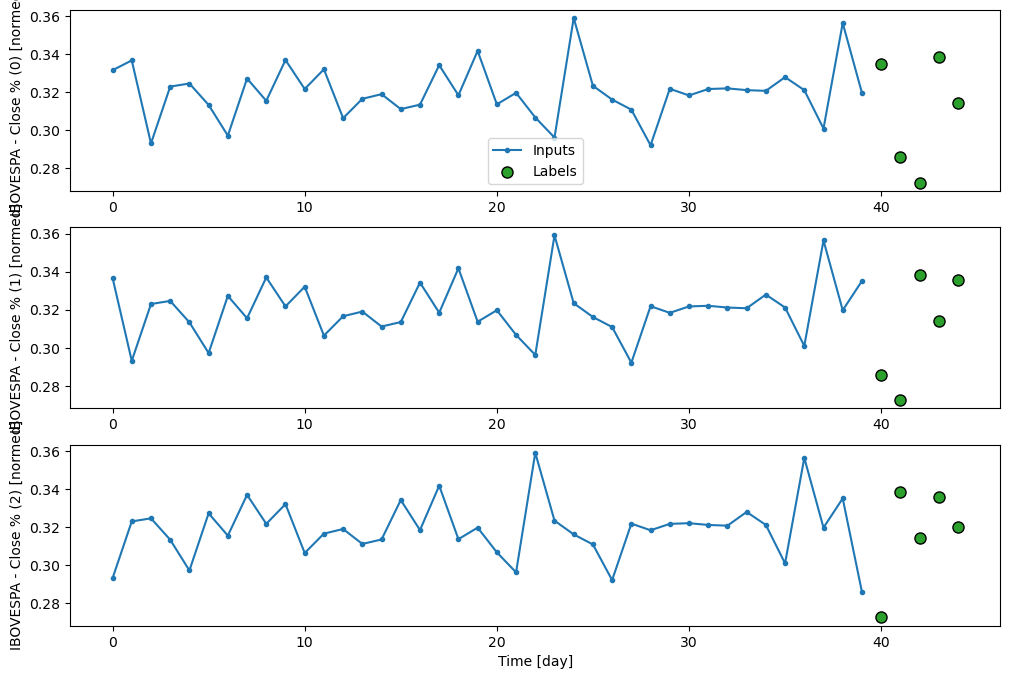

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:43 3s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 89.4330 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.3329  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 121.5899 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.4872

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 131.0278 - mean_squared_error: 0.3157 - root_mean_squared_error: 0.5332

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.4312 - mean_absolute_error: 0.4312 - mean_absolute_percentage_error: 131.4236 - mean_squared_error: 0.3203 - root_mean_squared_error: 0.5436

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 130.3166 - mean_squared_error: 0.3148 - root_mean_squared_error: 0.5427

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 128.1839 - mean_squared_error: 0.3053 - root_mean_squared_error: 0.5366

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 124.9564 - mean_squared_error: 0.2938 - root_mean_squared_error: 0.5275

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 121.4684 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5172

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 118.0882 - mean_squared_error: 0.2708 - root_mean_squared_error: 0.5068

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 114.6995 - mean_squared_error: 0.2601 - root_mean_squared_error: 0.4965

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 111.3839 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4864

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 108.2661 - mean_squared_error: 0.2408 - root_mean_squared_error: 0.4767

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 105.3294 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4675

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 102.6245 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4587

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 100.1607 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4504

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 97.8335 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4425 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 8261.2139 - mean_squared_error: 0.2033 - root_mean_squared_error: 0.4350

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 22634.0840 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4279

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 34802.2695 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4212

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 45157.0625 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4148

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 54007.6953 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.4087

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 61601.1953 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.4028

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 68136.8281 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3973

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 73776.6953 - mean_squared_error: 0.1683 - root_mean_squared_error: 0.3919

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2623 - mean_absolute_error: 0.2623 - mean_absolute_percentage_error: 78653.7500 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3868

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 82877.8438 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3818

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 86540.3672 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3771

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 89717.8125 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3725

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 92474.5859 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3682

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 94865.1797 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3639

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 96935.9766 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3599

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 98726.5781 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3559

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 100271.0078 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3521

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 101598.5547 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3484

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 102734.5859 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3449

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 103701.0938 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3414

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 104517.2500 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3381

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 105199.8047 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3349

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 105763.4375 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3317

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 106221.0391 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3287

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 106583.9844 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3257

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 106862.2969 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3228

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 107064.8828 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3200

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 107199.6172 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3173

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 107273.5156 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3147

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 107292.8281 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3121

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 107263.1250 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3096

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 107189.4141 - mean_squared_error: 0.1093 - root_mean_squared_error: 0.3071

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 107076.1406 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3047

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 106927.3281 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.3024

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 106746.5703 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.3001

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 106537.1094 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2979

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 106301.8828 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2957

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 106043.5000 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2936

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 105764.3672 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2915

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 105466.6172 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2895

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1736 - mean_absolute_error: 0.1736 - mean_absolute_percentage_error: 105152.2188 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2875

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 104822.9219 - mean_squared_error: 0.0963 - root_mean_squared_error: 0.2856

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 104480.3438 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2837

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1689 - mean_absolute_error: 0.1689 - mean_absolute_percentage_error: 104125.9141 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2819

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1674 - mean_absolute_error: 0.1674 - mean_absolute_percentage_error: 103760.9766 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2801

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 103386.7266 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2783

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 103004.2422 - mean_squared_error: 0.0910 - root_mean_squared_error: 0.2766

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 102614.5391 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2749

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 102218.5234 - mean_squared_error: 0.0890 - root_mean_squared_error: 0.2732

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1605 - mean_absolute_error: 0.1605 - mean_absolute_percentage_error: 101817.0078 - mean_squared_error: 0.0881 - root_mean_squared_error: 0.2716

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 101410.7500 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2700

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 101000.4453 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2684

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 100586.7188 - mean_squared_error: 0.0854 - root_mean_squared_error: 0.2668

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 100170.1406 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2653

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 99751.2422 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2638 

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 99330.4922 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2624

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 98908.3281 - mean_squared_error: 0.0822 - root_mean_squared_error: 0.2609

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 98485.1562 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 98061.3281 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2581

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 97637.1875 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2568

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 97213.0312 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2554

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 96789.1406 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2541

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 96365.7656 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2528

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 95943.1328 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2515

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 95521.4688 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2502

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 95100.9453 - mean_squared_error: 0.0757 - root_mean_squared_error: 0.2490

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 94681.7422 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2478

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 94264.0234 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2466

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 93847.9375 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2454

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 93433.5938 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2442

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 93021.1328 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2431

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 92610.6484 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2420

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 92202.2422 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2409

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 91795.9922 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2398

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 91391.9922 - mean_squared_error: 0.0703 - root_mean_squared_error: 0.2387

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 90990.2969 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2376

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 90590.9766 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2366

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 90194.0781 - mean_squared_error: 0.0687 - root_mean_squared_error: 0.2355

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 89799.6641 - mean_squared_error: 0.0682 - root_mean_squared_error: 0.2345

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 89407.7656 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2335

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 89018.4219 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2325

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 88631.6719 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2315

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 88247.5391 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2306

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 87866.0547 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2296

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 87487.2188 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2287

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 87111.0703 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2277

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 86737.6094 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2268

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 86366.8516 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2259

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 85998.7969 - mean_squared_error: 0.0634 - root_mean_squared_error: 0.2250

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 85633.4609 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2242

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 85270.8359 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2233

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 84910.9219 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2224

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 84553.7188 - mean_squared_error: 0.0617 - root_mean_squared_error: 0.2216

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 84199.2266 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2207

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 83847.4297 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2199

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 83498.3281 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2191

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 83151.9141 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2183

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 82808.1641 - mean_squared_error: 0.0597 - root_mean_squared_error: 0.2175

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 82467.0859 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2167

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 82128.6562 - mean_squared_error: 0.0590 - root_mean_squared_error: 0.2159

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 81792.8672 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2151

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 81460.3047 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2144

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 81296.0547 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2140 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 4.3248 - val_mean_squared_error: 3.1254e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 28.3024 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1016

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 26.2339 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1023 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.3098 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0967

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.2920 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0926

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.4897 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.2349 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0916

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.7573 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.2213 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0882

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.6602 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0864

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.1115 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0846

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.5715 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.0517 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0813

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.5718 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.1623 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8889 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.7220 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.5554 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 8798.7432 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 24255.7988 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 37342.0781 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 48478.3203 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 57997.0742 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 66163.9688 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 73193.2578 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 79259.2656 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 84504.9609 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 89048.4766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 92988.0859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 96406.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 99371.5859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 101943.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 104171.1797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 106097.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 107759.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 109187.9453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 110410.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 111450.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 112329.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 113064.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 113670.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 114163.7891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 114554.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 114854.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 115073.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 115219.0547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 115299.2109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 115320.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 115289.3672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 115210.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 115089.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 114930.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 114736.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 114511.6953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 114259.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 113982.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 113682.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 113362.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 113025.1562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 112671.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 112303.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111923.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 111531.0312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111129.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110718.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110299.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109874.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109442.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 109006.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108565.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108121.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107673.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107223.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106771.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106317.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105862.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105407.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104951.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104496.0469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104040.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103585.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103131.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102678.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102226.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101775.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101327.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100879.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100434.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99991.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99550.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99111.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98674.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98240.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97808.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97379.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96953.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96529.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96108.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95689.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95274.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94861.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94451.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94044.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93639.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93238.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92839.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92444.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92051.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91662.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91275.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90891.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90510.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90132.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89756.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89384.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89015.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88831.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88648.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88284.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87923.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87566.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87389.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 4.3719 - val_mean_squared_error: 3.1848e-04 - val_root_mean_squared_error: 0.0178 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 28.2868 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018

  2/237 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 27.6241 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1043

  3/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 26.2121 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1024

  4/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.1804 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0997

  5/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.2790 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0968

  7/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.2331 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0926

  9/237 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 23.4070 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0926

 10/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.3192 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0922

 12/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.9091 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

 14/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.3980 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 21.8436 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.5569 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.0079 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0845

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.4681 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 19.9492 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0812

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.4694 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.0622 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 29/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 18.7924 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6301 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 33/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.4675 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 8778.9248 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 24201.2441 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 39/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 37258.1172 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 48369.3359 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 57866.6953 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 66015.2344 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 69652.1719 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 73028.7344 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 49/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 79081.1094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 81792.4922 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 51/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 84315.0156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 53/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 88848.3281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 90883.5547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 92779.0781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 57/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 96189.3516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 59/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 99148.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 61/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 101714.2266 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 63/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 103937.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 65/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 105859.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 67/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 107517.2500 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 69/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 108942.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 71/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 110162.3359 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 72/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 110702.6562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 74/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 111657.4688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 112460.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 112809.9062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 113127.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 113415.4609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 113674.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 113907.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 83/237 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 114297.4062 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0673

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 114596.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 87/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114814.8516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 89/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 114960.1172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 90/237 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 115007.8359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 92/237 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 115057.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 115052.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 114996.6484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 114896.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 114755.9062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 114579.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 114370.0938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 114131.7344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 113867.1484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 113579.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 113269.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 112941.6953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 112771.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 112596.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 112418.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 112051.2891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 111671.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 111477.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 111081.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 110675.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 110261.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

130/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109840.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

131/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109627.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

132/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109412.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 109196.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108979.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108761.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108542.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108321.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108100.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107878.0859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107431.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106982.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106531.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106078.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

149/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105625.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

151/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105170.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104716.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104261.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103806.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103352.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102899.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102447.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101996.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101547.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

169/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101099.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

171/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100653.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100209.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99766.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99326.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98888.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98453.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98019.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97589.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97160.9688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96735.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96312.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95892.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95474.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95060.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94648.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94239.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93832.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93429.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93028.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92631.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92236.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91844.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91456.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91070.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90687.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90306.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89929.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89555.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89183.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88815.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88449.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88086.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87726.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87193.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 4.1786 - val_mean_squared_error: 2.9148e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 28.3505 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 26.0782 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 24.2431 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0946

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3867 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0908

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.6798 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0912

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.4687 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.0150 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.4879 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.9295 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 21.3823 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.8401 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 20.3172 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.8301 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4172 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.1449 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0768

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.9805 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.8935 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.8140 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.7347 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 8667.3213 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 23892.5645 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 36782.5859 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 47751.8164 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 57127.8086 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 65172.2227 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 72096.0859 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 78071.1250 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 83238.1484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 87713.5234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 91594.0469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 94960.7344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 97881.8125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 100415.0000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 102609.4141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 104507.0234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 106143.8516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 107550.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 108755.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 109779.7344 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 110645.0703 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 111023.6328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 111368.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 111966.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 112452.1406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 112837.3281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 113132.8594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 113348.1562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 113491.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 113570.5156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 113591.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 113560.8203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 113483.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 113364.0000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 113206.9688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 113016.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 112794.7969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 112546.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 112273.0547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 111977.9141 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 111663.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111330.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110982.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110619.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110244.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109858.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109462.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109058.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108645.8203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108226.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107801.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107371.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106937.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106719.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106279.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105837.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105393.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104947.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104499.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104051.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103602.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103153.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102704.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102256.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101808.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101361.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100916.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100471.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100028.7266 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99587.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99147.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98710.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98274.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97841.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97410.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96981.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96554.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96130.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95709.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95290.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94874.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94460.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94049.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93641.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93236.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92834.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92434.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92037.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91643.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91252.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90864.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90479.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90096.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89717.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89340.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88966.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88595.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88227.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87862.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87499.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87139.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86783.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86428.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86079.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136 - val_mean_absolute_percentage_error: 4.1428 - val_mean_squared_error: 2.8682e-04 - val_root_mean_squared_error: 0.0169 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 28.3468 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1012

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 26.0911 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1009 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 24.1676 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0951

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.1516 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.3374 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0912

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.0831 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6072 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.0732 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.5126 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 20.9684 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.4328 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 19.9186 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4406 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0788

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0367 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7791 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6308 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4767 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 8214.4092 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 22642.9160 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 34858.4023 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 45253.6133 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 54138.9609 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 61762.4062 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 68323.9453 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 73986.3047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 78882.9375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 83124.1094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 86801.5625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 89992.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 92760.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95160.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97240.4844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99038.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99843.3281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100589.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 68/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101282.2266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101923.4141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102516.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103064.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104035.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104855.6250 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105541.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106108.0547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106568.1250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106933.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107213.2266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107417.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107553.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107627.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107647.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107618.7734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107545.3672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107432.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107283.4297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107102.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106892.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106657.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106398.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106118.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105820.2969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105505.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105175.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104831.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104476.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104110.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103735.2266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103351.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102960.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102563.8125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102161.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101753.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101342.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100927.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100509.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100089.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99667.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605 

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99244.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98819.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98394.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97969.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97543.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97118.3828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96693.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96269.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95846.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95424.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95004.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94585.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94168.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93752.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93338.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92926.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92517.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92109.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91704.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91301.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90900.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90502.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90106.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89713.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89323.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88935.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88549.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88167.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87787.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87409.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87034.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86663.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86293.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85927.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85563.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85202.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84844.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84488.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84135.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83785.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83437.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83092.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82750.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82410.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82074.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81740.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81575.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9259 - val_mean_squared_error: 2.5496e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4604 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 26.0725 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 24.1226 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0941

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.0556 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1761 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 22.8905 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.4020 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 21.8641 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3046 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0845

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.7639 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0828

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.4983 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 19.9738 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.4855 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0419 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.6743 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.5350 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3847 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.2433 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15399.9502 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 28385.0840 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 39407.9375 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 48809.7812 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 56861.8164 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 63781.7617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69745.9922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74898.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79358.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83223.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86575.7734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88081.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89484.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90791.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93140.8906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95176.3203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96936.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98454.6875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99759.8359 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100876.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101827.1562 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102629.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103301.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103855.6406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104093.0859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 104495.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104810.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 105045.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105211.4375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105313.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105359.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105354.2812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105303.4922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 105211.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 105083.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104921.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104729.7266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104511.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104269.1719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104005.3359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103866.0469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103722.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103573.9922 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103421.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103105.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102775.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102433.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102080.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101717.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101346.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100967.4062 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100581.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100190.2188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99793.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612 

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99392.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98988.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98580.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98170.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97758.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97344.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96929.6875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96513.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96097.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95681.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95264.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94848.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94433.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94019.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93605.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93193.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92782.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92373.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91965.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91559.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91155.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90753.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90353.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89955.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89560.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89166.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88776.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88387.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88001.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87617.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87236.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86858.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86482.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86109.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85738.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85370.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85005.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84642.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84282.2969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83924.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83570.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83218.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82868.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82521.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82177.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81836.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81497.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81161.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80827.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80496.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80167.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79844.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8027 - val_mean_squared_error: 2.3775e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5047 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 26.0272 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.0855 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0932

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0551 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2120 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.9447 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.4644 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9301 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.3720 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.8323 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.3033 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7956 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3250 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.9269 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.6775 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.5417 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.3999 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8008.6885 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22075.1641 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 33984.1523 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 44118.5352 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 52780.9375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 60213.1016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 66610.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72130.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 76904.0625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81038.8203 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84624.0000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87734.4609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90433.2109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92773.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 94801.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96554.1875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98066.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99366.4375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100478.9766 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101425.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102225.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 102893.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103446.0859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 103894.6094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 104250.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 104523.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 104722.4219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 104854.9141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 104898.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 104943.9375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 104938.8047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 104888.2109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 104796.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 104668.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 104507.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104316.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104099.2969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 103857.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103595.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103313.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103013.8594 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 102699.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102370.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102029.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101678.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101316.7578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 100946.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 100569.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100185.0547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99795.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615 

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99400.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99000.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98597.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98192.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97783.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97372.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96960.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96547.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96133.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95718.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95303.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94889.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94474.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94061.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93648.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93236.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92825.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92416.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92008.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91602.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91198.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90796.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90395.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89997.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89600.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89206.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88815.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88425.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88038.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87654.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87272.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86892.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86515.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86141.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85769.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85400.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85033.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84669.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84308.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83949.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83593.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83240.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82889.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82541.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82196.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81853.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81513.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81175.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80841.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80508.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80178.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79851.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79529.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 3.7873 - val_mean_squared_error: 2.3629e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5070 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9744 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0643 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1119 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3346 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1014 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6367 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.1103 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5541 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.0133 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.4835 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9739 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.5009 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.0989 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.8436 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.7018 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.5552 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8065.3545 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22231.3184 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34224.5312 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 44430.5898 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53154.2617 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 60638.9883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 67081.1406 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 72640.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 77448.0000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81612.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 85222.5469 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88355.0000 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91072.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93429.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95471.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97237.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98760.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100069.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101189.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102142.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102948.1016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103621.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104177.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 104629.4453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104987.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 105262.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105463.1094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 105596.5391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105669.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105689.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105660.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105588.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105477.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105331.7188 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105154.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104948.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104716.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104462.7656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104188.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103895.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103585.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103261.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 102924.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102575.7031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102216.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101848.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101471.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101087.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 100697.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100302.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99902.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614 

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99498.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99091.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98681.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98268.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97854.2422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97438.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97021.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 96604.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96186.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95769.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95351.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94934.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94518.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94103.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93688.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93276.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93070.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92659.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92250.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91843.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91438.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91034.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90633.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90234.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89837.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89443.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89051.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88661.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88274.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87889.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87507.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87127.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86750.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86376.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86004.3906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85635.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85268.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84904.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84543.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84185.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83829.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83476.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83125.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82777.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82432.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82089.9531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81750.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81412.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81078.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80746.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80416.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80091.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9006 - val_mean_squared_error: 2.5249e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4439 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9851 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0991 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 24.0753 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0933

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.1095 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.3307 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.0999 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.6353 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.1090 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0859

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.5510 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.0081 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.4767 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.9648 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.4889 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.0838 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.8240 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.6768 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.5256 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8143.2461 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22446.3867 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34555.7383 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 44860.6289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53668.7734 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 61225.9844 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 67730.5156 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 73343.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 78197.7656 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 80375.0859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 84289.6328 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 87685.0781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 90631.2031 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93186.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95402.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97319.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98976.0703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100402.4688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101626.1016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102670.4609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103555.9766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103944.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104624.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105186.3828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 105642.4609 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106004.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106281.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106484.2109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106618.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106693.1094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106712.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 106683.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106611.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 106499.0859 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106351.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106172.2422 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105964.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105730.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 105474.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105196.9375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104901.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104588.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104261.5469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103921.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103568.8672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103206.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102834.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102453.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102066.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101672.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101273.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100869.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100462.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100050.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99636.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609 

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99220.0234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98801.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98381.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97961.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97539.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97118.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96696.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96274.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95853.8047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95433.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95014.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94596.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94179.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93763.8516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93350.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92938.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92527.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92119.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91713.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91309.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90907.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90508.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90111.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89716.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89324.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88934.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88547.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88162.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87780.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87401.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87024.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86650.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86278.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85910.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85544.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85180.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84820.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84462.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84107.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83754.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83404.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83057.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82712.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82370.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82031.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81695.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81361.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81030.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80867.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9031 - val_mean_squared_error: 2.5325e-04 - val_root_mean_squared_error: 0.0159 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4166 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 25.9808 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0993 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.0719 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.0876 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.2883 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0899

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.0491 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.5807 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.0532 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0859

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.4956 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.9537 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.4237 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.9134 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.4397 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.0363 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.7769 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.6297 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.4791 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8196.0479 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22592.2246 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 34780.3398 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45152.2617 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 54017.6992 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 61624.0625 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 68170.9062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 73820.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 78706.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 82937.9297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86607.1484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89790.5156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 92552.5234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 94947.7812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 96022.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97952.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99619.7266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101055.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102287.0000 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103338.1484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104229.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104978.7656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105601.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106112.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106522.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106843.4453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107083.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107252.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107356.8594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107403.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107398.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107346.4062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107252.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107121.6797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106956.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106761.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106539.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106292.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106023.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105734.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105428.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105106.0469 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104769.8516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104421.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104061.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103691.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103312.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102926.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102533.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102133.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101729.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101321.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100908.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100493.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100075.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99654.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99233.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98810.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98386.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97961.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97537.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97112.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96688.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96265.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95843.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95421.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95001.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94582.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94165.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93749.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93335.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92923.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92514.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92106.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91700.8984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91297.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90896.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90498.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90102.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89708.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89317.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88929.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88543.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88160.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87779.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87401.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87026.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86654.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86284.4219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85917.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85553.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85191.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84832.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84476.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84122.7344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83771.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83423.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83078.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82735.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82395.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82058.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81723.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81392.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8402 - val_mean_squared_error: 2.4387e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 75ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4508 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9576 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0826 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1745 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.4508 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.2542 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.8050 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.2861 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.7325 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.1911 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.6591 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 20.1455 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.6670 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.2579 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0768

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.9910 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.8349 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.6755 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 8278.1152 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 22818.4258 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 35128.5703 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 45604.3320 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 54558.5273 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 62241.0469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 68853.4297 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 74559.6641 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 79494.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 81707.6641 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 85687.1250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 89138.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 90689.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 92133.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93479.1484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 95898.3828 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 96984.0234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98933.3594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99806.3203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 100617.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101369.5156 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 102713.3047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 103863.3281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 104841.8438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105668.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 106359.4766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106930.3906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107394.0234 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107761.8906 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108044.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108155.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108326.3281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108431.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108478.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108482.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108452.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108378.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108326.5938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108264.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108194.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108114.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107932.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

104/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107830.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107721.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107483.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107222.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107084.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106941.1094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106640.4062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106483.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106158.3047 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105818.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105466.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

122/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105102.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104729.3516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104539.1641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104346.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103956.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103559.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103156.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102748.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102542.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102127.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101918.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101709.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101499.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101077.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100652.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100226.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99799.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602 

150/237 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99371.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98942.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98513.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98085.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97656.9609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97229.3359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96802.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96376.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95952.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95529.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95107.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94688.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94478.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94270.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93854.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93440.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93234.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93028.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92823.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92415.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92008.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91605.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91203.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90805.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

192/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90606.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90211.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90015.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89819.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89624.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89236.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88850.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88467.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88087.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87709.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87334.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86962.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86593.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86226.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85862.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85501.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85143.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84787.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84434.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84084.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83736.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83391.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83049.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82710.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82207.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8709 - val_mean_squared_error: 2.4862e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4227 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9499 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0394 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0615 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.2727 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.0398 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.5748 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.0492 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4926 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9507 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.4187 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9062 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.4295 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0230 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.7597 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6073 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.5257 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4515 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8255.3447 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22755.9609 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35032.5000 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 45479.6641 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 54409.4219 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62070.9648 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 68665.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74355.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79277.0703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 83539.4531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87235.2891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90441.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93223.8047 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95636.4375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97726.4141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99533.7109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101092.6406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102432.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103579.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104555.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105379.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106068.9844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106638.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107100.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107467.5781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107749.0469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107954.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108090.6797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108165.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108185.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108156.6406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108082.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107969.1797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107819.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107637.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107427.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107190.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106930.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106649.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106349.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106032.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105700.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105355.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104998.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104630.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104253.6797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103868.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103475.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103076.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102671.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102262.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101848.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101431.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101011.8906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100589.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100165.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99740.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99313.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98886.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98458.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98031.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97603.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97176.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96750.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96325.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95901.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95479.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95058.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94638.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94220.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93805.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93391.2812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92979.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92569.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92162.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91757.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91355.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90954.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90557.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90162.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89769.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89379.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88992.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88607.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88225.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87846.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87469.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87096.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86725.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86356.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85991.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85628.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85268.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84910.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84555.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84203.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83854.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83507.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83164.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82822.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82484.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81983.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8072 - val_mean_squared_error: 2.3941e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4456 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9257 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0494 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1524 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.4495 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.2661 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.8249 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.3107 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.7598 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.2200 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.6871 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 20.1719 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.6914 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.2800 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 19.0098 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.8494 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.6859 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8311.1455 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15919.0439 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 29342.0840 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 40736.6680 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 50455.5742 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 58779.1523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65932.4609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 72097.8281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 77424.2188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 82034.2578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86029.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89495.1719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 92502.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95110.6172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97371.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99328.8047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101019.2734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102475.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103724.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104789.9297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105693.7266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106453.5859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 107085.4375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107603.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108019.2969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108344.4453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108588.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108759.3047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108865.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108912.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108906.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108854.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108759.5703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108626.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108459.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108363.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108261.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108151.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107913.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107651.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107368.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107066.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106747.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106413.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106066.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105706.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105336.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104956.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104568.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104173.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103771.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103364.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102952.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102535.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102116.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101693.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101268.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100841.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100412.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99983.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99553.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99122.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98692.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98262.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97832.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97403.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96975.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96548.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96123.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95699.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95277.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94856.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94437.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94021.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93606.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93194.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92784.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92376.6406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91971.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91568.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91168.1250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90770.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90375.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89982.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89592.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89205.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88820.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88439.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88060.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87683.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87310.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86939.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86571.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86205.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85843.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85483.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85126.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84771.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84420.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84071.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83725.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83381.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83040.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82703.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82536.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7942 - val_mean_squared_error: 2.3766e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4528 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9257 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 24.0325 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0924

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1049 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3712 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1702 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.7210 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.2032 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.6505 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.1105 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.5782 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 20.0642 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.5850 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.1752 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.9068 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.7482 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5867 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 8313.7480 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 22916.9453 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 35280.3281 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 45801.3984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 54794.3203 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62510.0664 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 69151.0469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 74881.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 79837.8828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 84130.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 87852.3906 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91081.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93883.2656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96312.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98417.7188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100237.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101807.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103157.3516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104312.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105295.0938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106125.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106819.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107392.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107858.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108227.7656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108511.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108717.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108855.2656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108930.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108951.2500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108921.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108847.3984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108732.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108582.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108399.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108186.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107948.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107686.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107403.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107101.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106782.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106448.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106100.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105741.2188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105370.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104991.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104602.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104207.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103805.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103397.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102985.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102569.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102149.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101726.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101301.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100874.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100445.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100015.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99585.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99155.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98724.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98294.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97864.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97435.2500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97007.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96580.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96154.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95730.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95308.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94887.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94468.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94051.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93637.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93224.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92814.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92406.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92001.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91598.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91197.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90799.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90404.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90011.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89621.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89234.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88849.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88467.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88088.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87712.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87338.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86967.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86599.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86233.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85871.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85511.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85153.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84799.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84447.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84098.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83752.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83408.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83067.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82563.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8339 - val_mean_squared_error: 2.4298e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4180 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9213 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0079 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0310 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2462 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0158 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5527 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.0283 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.4725 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.9317 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.4015 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.8905 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.4149 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.0090 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7447 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5902 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4326 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8315.9326 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22923.2441 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35290.1094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45814.1445 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54809.6016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62527.5195 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 65972.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69170.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74902.9062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79860.2188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84153.9609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87876.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91107.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93909.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96339.9453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98445.3047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100265.8984 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101836.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103186.2734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104341.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105324.6172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106154.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106849.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107422.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107888.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108258.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108541.6641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108748.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108885.8125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108961.5625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108981.8203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108952.2578 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108877.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108763.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108612.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108429.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108217.3203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107978.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107716.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107433.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107131.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106812.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106478.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106130.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105770.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105400.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105020.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104632.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104236.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103834.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103427.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103014.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102597.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102177.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101754.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101329.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100902.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100473.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100043.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99613.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99182.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98752.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98321.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97891.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97462.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97034.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96607.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96181.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95757.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95334.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94914.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94495.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94078.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93663.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93250.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92840.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92432.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92027.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91623.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91223.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90825.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90429.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90037.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89646.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89259.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88874.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88492.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88113.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87736.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87362.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86991.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86623.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86258.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85895.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85535.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85177.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84823.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84471.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84122.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83775.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83432.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83090.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82753.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82586.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8512 - val_mean_squared_error: 2.4566e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4145 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9226 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0155 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0551 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2919 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0755 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6191 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0984 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5448 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0048 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4730 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.9598 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4817 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0736 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.8074 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6509 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4910 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8298.5488 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22875.1543 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35216.0273 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45717.9375 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54694.4844 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62396.1797 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69025.0703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74745.5469 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79692.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83977.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87692.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90915.6250 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93712.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96137.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98238.4531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100055.2266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101622.3203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102969.4609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104122.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105103.3125 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105931.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106624.7344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107197.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107661.8672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108030.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108313.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108519.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108657.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108732.5938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108752.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108723.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108649.1484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108534.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108384.5234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108201.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107989.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107751.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107490.3906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107207.8203 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106906.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106588.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106254.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105907.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105548.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105178.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104799.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104412.4375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104017.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103616.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103209.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102798.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102382.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101963.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101541.1016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101116.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100690.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100262.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99833.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99404.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98974.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98544.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98115.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97686.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97257.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96830.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96404.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95979.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95556.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95134.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94714.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94296.5703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93880.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93466.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93054.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92645.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92238.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91833.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91431.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91031.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90634.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90239.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89847.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89458.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89071.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88687.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88306.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87928.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87552.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87179.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86809.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86441.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86076.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85714.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85355.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84998.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84645.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84293.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83945.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83599.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83256.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82916.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82412.8125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8179 - val_mean_squared_error: 2.4094e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4218 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9071 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9992 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0472 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.2927 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.0829 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.6311 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.1132 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.5615 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0231 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.4919 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0804

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.9790 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0789

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.5009 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.0926 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.8257 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6684 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.5080 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8352.8584 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 23025.0449 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35446.8398 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 46017.6094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55053.0195 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62805.2188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69477.5781 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 75235.5625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 80214.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84527.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 88267.2734 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91511.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 94326.6406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96767.8203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98882.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100711.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102288.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103644.5547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104805.0000 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105792.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106626.2891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107323.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107899.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108367.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108738.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109023.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109231.1953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109369.3984 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109445.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109465.8281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109436.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109361.4922 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109246.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109095.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108911.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108697.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108458.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108195.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107910.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107607.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107286.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106951.1953 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106601.9688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106240.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105868.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105486.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105097.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104699.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104295.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103886.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103472.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103053.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102631.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102206.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101779.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101350.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100919.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100488.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100056.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99623.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99190.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98758.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98326.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97895.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97465.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97036.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96608.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96182.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95758.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95335.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94914.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94496.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94079.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93665.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93252.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92843.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92435.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92030.8672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91628.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91228.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90831.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90436.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90045.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89655.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89269.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88885.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88504.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88126.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87750.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87378.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87008.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86641.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86276.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85915.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85556.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85199.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84846.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84495.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84147.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83802.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83460.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82953.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8205 - val_mean_squared_error: 2.4097e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0065


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:29s:11ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:42:10.879300: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 5,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:39:31',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %', 'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:2m:29s:11ms',
 'TRAINING_EPOCHS': 17,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 21:42:11.103912: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4380 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 23.9536 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.8817 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.0574 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 20.9579 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 19.8923 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 18.9232 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.2706 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 17.9643 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 22578.2188 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 45124.7773 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 61586.7461 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73775.9688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 82887.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89736.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 94890.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 98757.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101633.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103740.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104915.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106048.5547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106779.0547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107187.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107338.7031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107281.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107188.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107057.1172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106978.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106697.1797 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106354.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105959.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105817.2734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105670.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105364.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104876.3750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104358.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103814.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103440.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103250.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102864.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102471.2344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101870.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101260.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100640.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100224.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99594.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98962.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98326.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97690.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97266.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96842.5156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96419.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95996.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95364.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94734.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94108.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93486.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92867.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92254.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91847.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91242.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90642.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90047.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89458.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88875.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88298.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88107.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87916.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87726.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87537.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87349.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87161.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86974.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86787.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86416.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86048.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85683.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85320.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84781.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84248.3203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83896.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83547.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83028.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82515.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82008.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 81343.8906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537


Loss: 0.028735630214214325 - MAE: 0.028735630214214325 - MSE: 0.001804346451535821 - MAPE: 42398.5234375 - RMSE: 0.042477600276470184


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 3.9902 - mean_squared_error: 2.7244e-04 - root_mean_squared_error: 0.0165

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 3.9462 - mean_squared_error: 2.6096e-04 - root_mean_squared_error: 0.0162

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 3.8809 - mean_squared_error: 2.5185e-04 - root_mean_squared_error: 0.0159

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 3.8734 - mean_squared_error: 2.5049e-04 - root_mean_squared_error: 0.0158


Loss: 0.012374763377010822 - MAE: 0.012374763377010822 - MSE: 0.0002409653679933399 - MAPE: 3.820499897003174 - RMSE: 0.015523059293627739


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 5.9923 - mean_squared_error: 5.4733e-04 - root_mean_squared_error: 0.0234

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 5.7968 - mean_squared_error: 5.4944e-04 - root_mean_squared_error: 0.0234

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 5.5931 - mean_squared_error: 5.3490e-04 - root_mean_squared_error: 0.0231


Loss: 0.01735823228955269 - MAE: 0.01735823228955269 - MSE: 0.0005203590844757855 - MAPE: 5.389279365539551 - RMSE: 0.02281138114631176


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

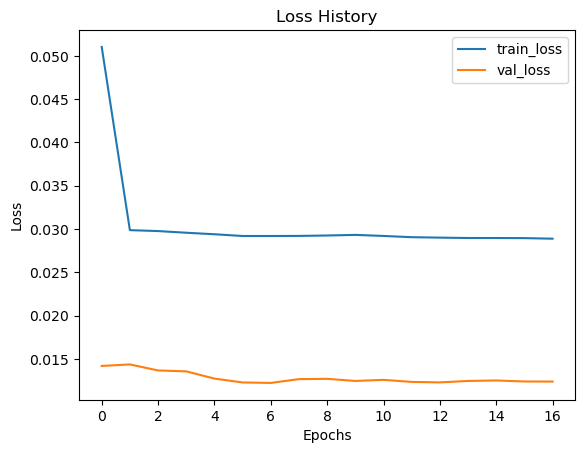

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

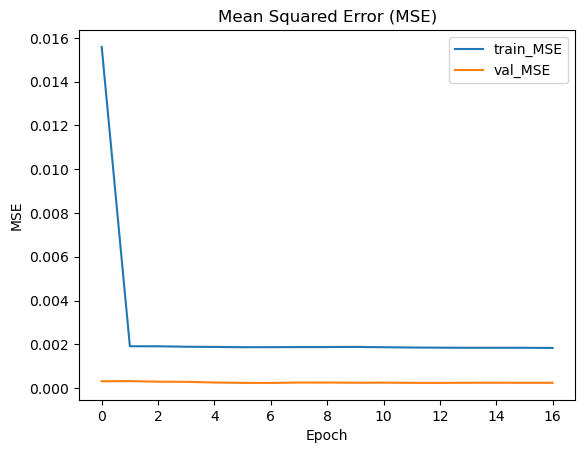

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

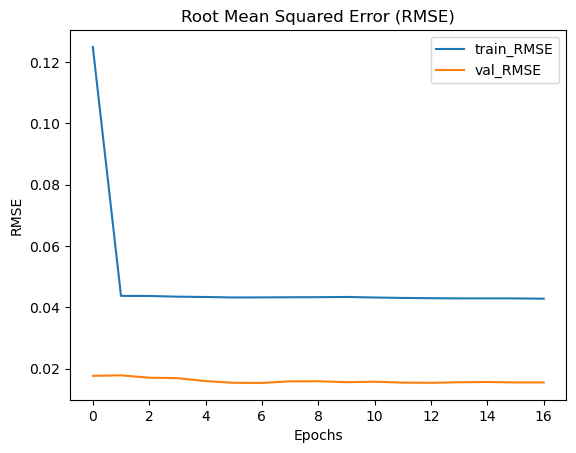

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

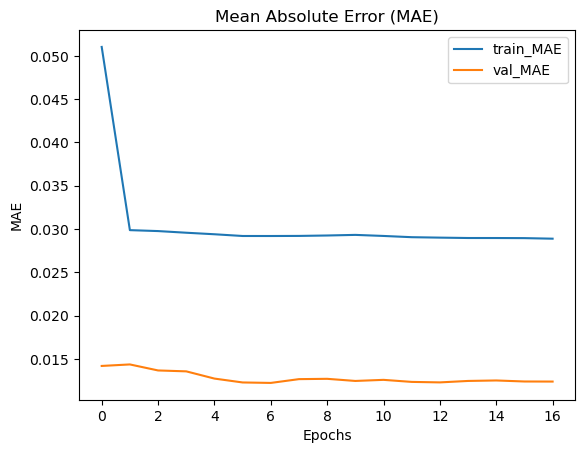

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

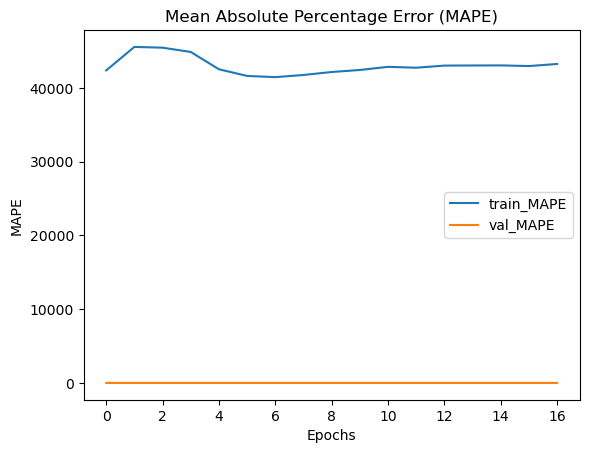

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:42:20.881295: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


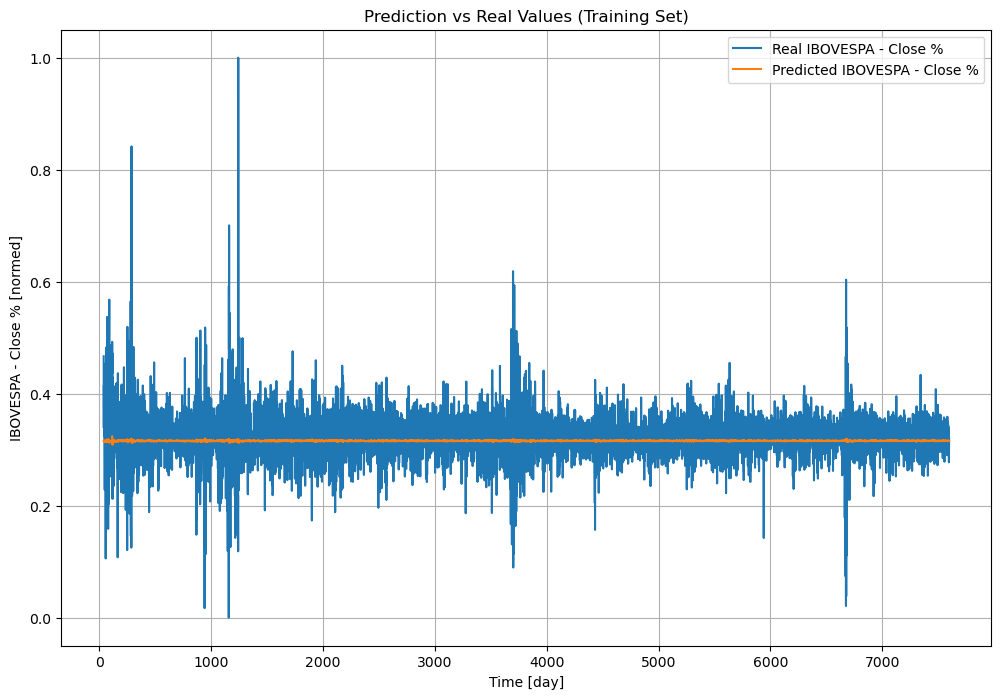

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


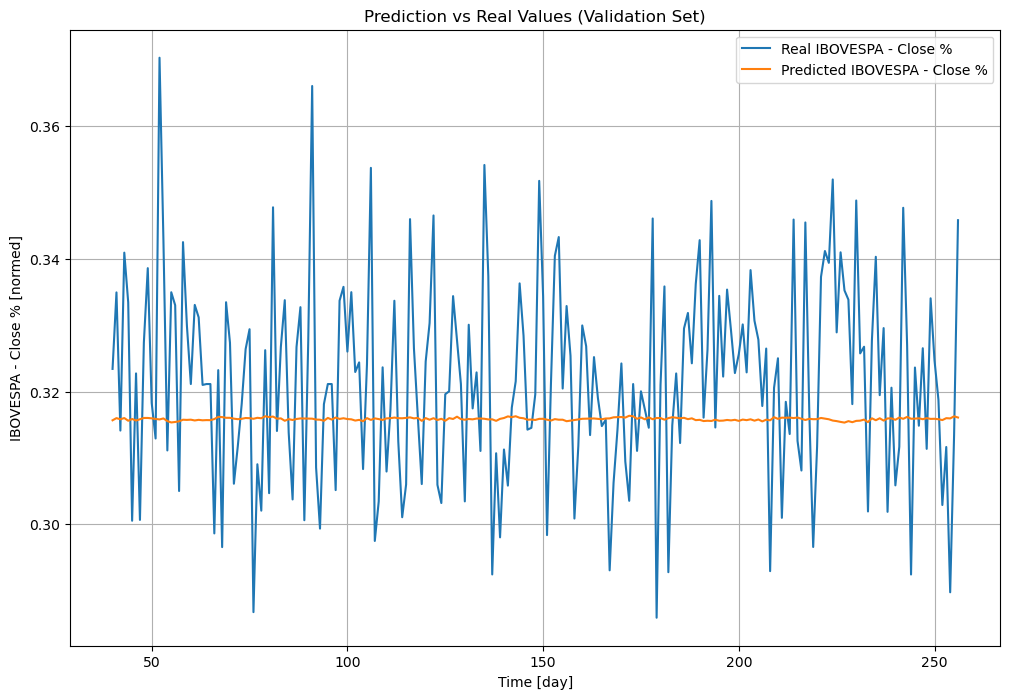

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


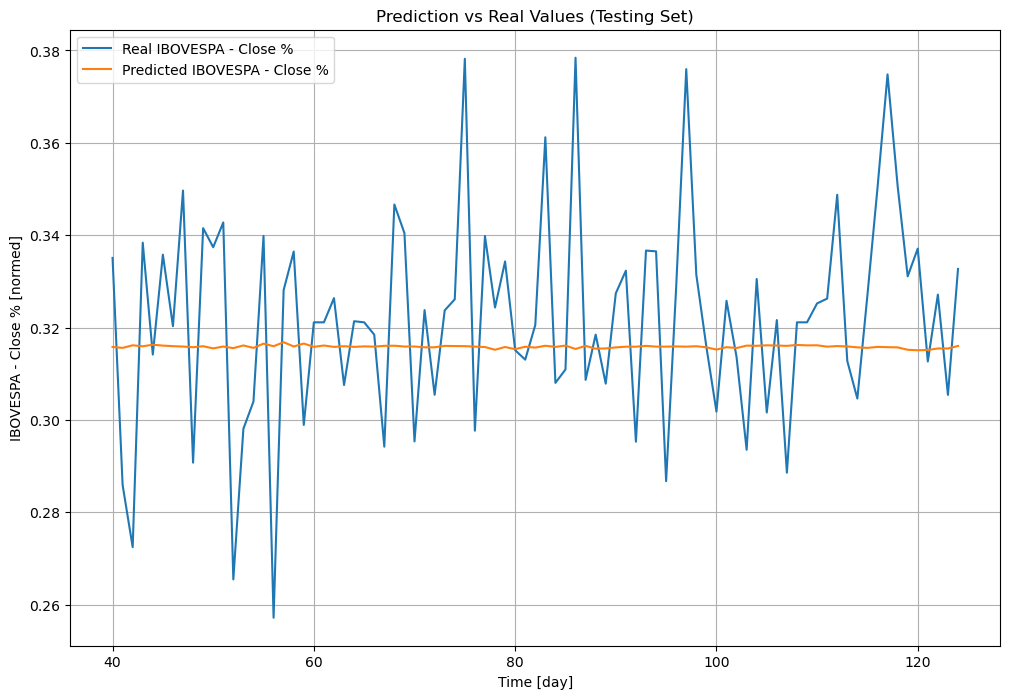

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

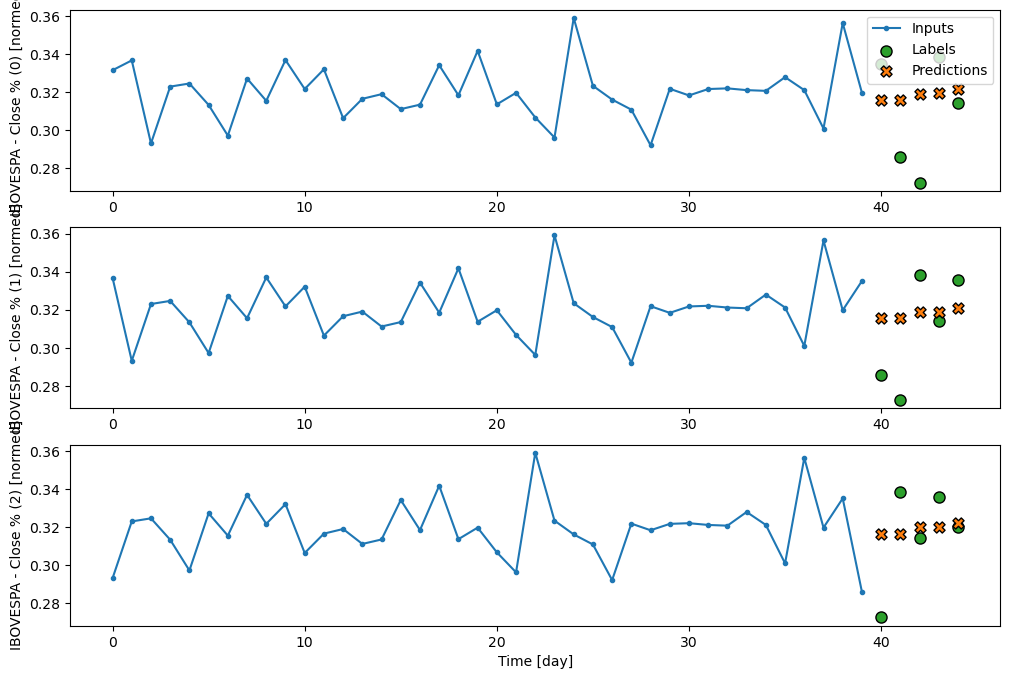

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:48s:582ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[[0.31581226, 0.31581226, 0.31581226, ..., 0.31581226,
         0.31581226, 0.31581226],
        [0.3157595 , 0.3157595 , 0.3157595 , ..., 0.3157595 ,
         0.3157595 , 0.3157595 ],
        [0.3192829 , 0.3192829 , 0.3192829 , ..., 0.3192829 ,
         0.3192829 , 0.3192829 ],
        [0.31938457, 0.31938457, 0.31938457, ..., 0.31938457,
         0.31938457, 0.31938457],
        [0.3216829 , 0.3216829 , 0.3216829 , ..., 0.3216829 ,
         0.32168287, 0.32168287]],

       [[0.31560576, 0.31560576, 0.31560576, ..., 0.31560576,
         0.31560576, 0.31560576],
        [0.31565437, 0.31565437, 0.31565437, ..., 0.31565437,
         0.31565437, 0.31565437],
        [0.31903386, 0.31903386, 0.31903386, ..., 0.31903386,
         0.31903386, 0.31903386],
        [0.31897426, 0.31897426, 0.31897426, ..., 0.31897426,
         0.31897426, 0.31897426],
        [0.321079  , 0.321079  , 0.321079  , ..., 0.321079  ,
         0.32107896, 0.32107896]],

       [[0.31616515, 0.31616515, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')